In [1]:
import bff
from pathlib import Path

In [10]:
main_dir = Path('../').resolve()

fn_specs = main_dir / '04-qoi/qoi-specs.yaml'
fn_train = [
    dict(
        inputs = main_dir / '04-qoi/qoi-train-inputs.npy',
        outputs = dict(
            rdf = main_dir / '04-qoi/qoi-train-rdf.npy',
            hb = main_dir / '04-qoi/qoi-train-hb.npy',
            restr = main_dir / '04-qoi/qoi-train-restr.npy'
        ),
        outputs_ref = dict(
            rdf = main_dir / '04-qoi/qoi-ref-rdf.npy',
            hb = main_dir / '04-qoi/qoi-ref-hb.npy',
            restr = main_dir / '04-qoi/qoi-ref-restr.npy'
        ),
        observations = main_dir / '04-qoi/qoi-observations.yaml',
        nuisances = main_dir / '04-qoi/qoi-nuisances.yaml',
        settings = main_dir / '04-qoi/qoi-settings.yaml'
    )
]

fn_hyper = {
    'rdf': './hyper-rdf.yaml',
    'hb': './hyper-hb.yaml',
    'restr': './hyper-restr.yaml',
}

train_data = [bff.structures.TrainData(**t) for t in fn_train]

# Run optimization
learner = bff.BFFLearn(*train_data, specs=fn_specs)
learner.setup_lgp(fn_hyper=fn_hyper)
results = learner.run()

# Uncomment if the results are already generated
# fn_chain = './mcmc.h5'
# fn_priors  = './priors.yaml'
# fn_tau = './tau.npy'
# fn_specs = '../04-qoi/qoi-specs.yaml'
# results = bff.structures.InferenceResults(fn_chain, fn_priors, fn_tau, fn_specs)

In [11]:
results.get_chain()

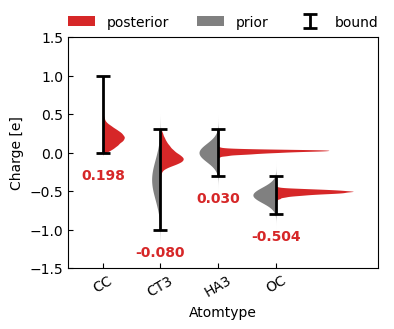

In [12]:
bff.plotting.plot_marginals(results)

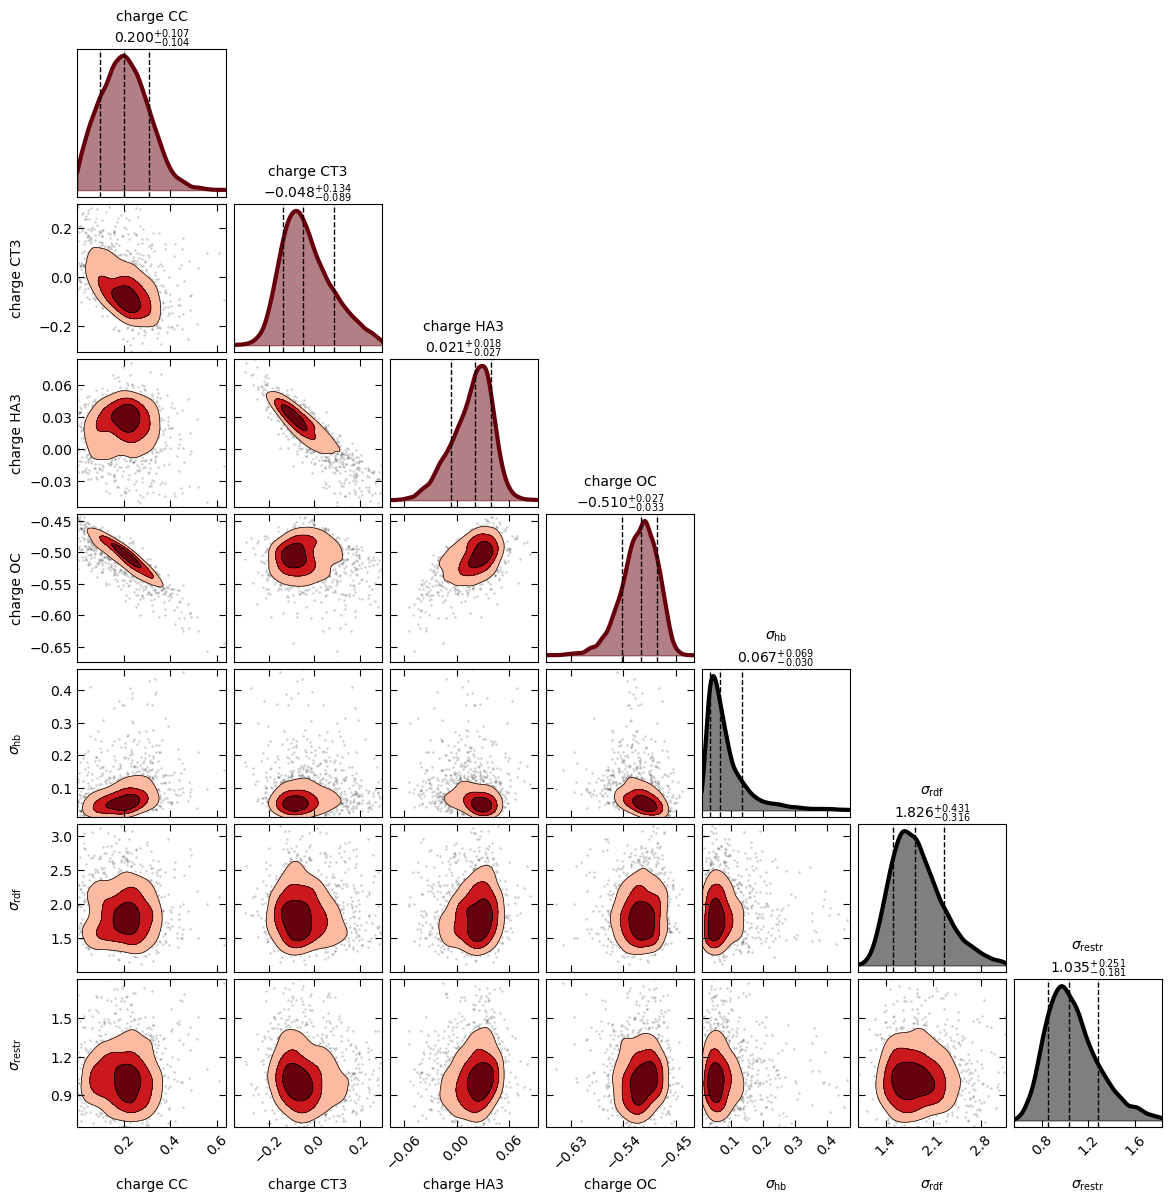

In [5]:
bff.plotting.plot_corner(results.chain_explicit_, results.labels_explicit_)

In [8]:
samples = results.sample_posterior(n_samples=100, complete=True)